 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5607) </b> </h1> </center>

<b> Programming Assignment - 04 - Neural Networks</b>

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Assignment on Neural Networks </b> <br>
This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques and ResNet to overcome the problems of overfitting and vanishing gradients.

In [1]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

<b>  Part - (1) : Train a classification network from scratch </b> 
1. Load MNIST data and create train, test splits
2. Design a simple classification network


> Network should consists of three Dense Layers with 512 nodes. The same architecture is used throughout the assignment to understand the effect of hyper parameters.

> Use stochastic gradient descent optimization algorithm to update the parameters. You can use the learning rate suitable for the MNIST digit classification problem.

> Use ReLU activation function in the first two layers. Softmax activation function should be used at the last layer to get the posterior probability of the classes.






3. Train the network using MNIST training data and evaluate the performance on MNIST test data



Mounted at /content/drive
X_train shape (60000, 784)
y_train shape (60000,)
X_test shape (10000, 784)
y_test shape (10000,)


w's :-  (784, 512) (512, 512) (512, 512) (512, 10)
b's :-  (1, 512) (1, 512) (1, 512) (1, 10)


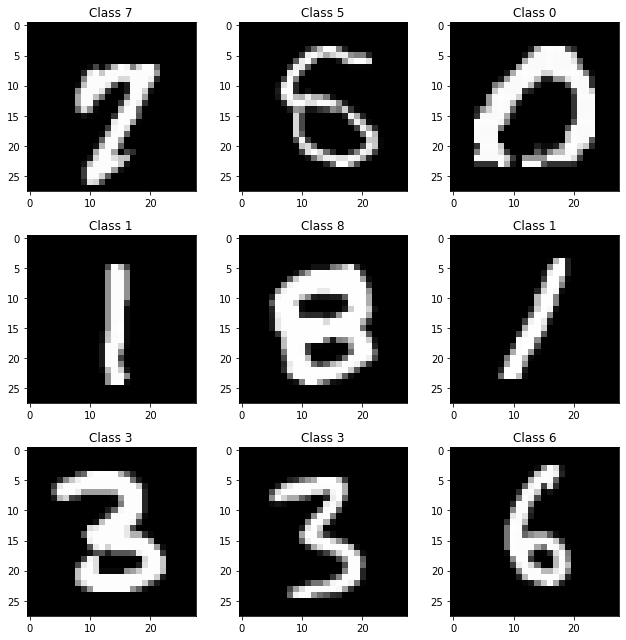

In [2]:
##################################################
#Load MNIST data.
##################################################
#Mount the drive
from google.colab import drive
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt

########################################
########################################

# MNIST Data reading ( you may define your own function for reading MNIST data )
#Extract .gz files and place in the drive 
drive.mount('/content/drive',force_remount=True)
root_path='/content/drive/MyDrive/Colab Notebooks'
train_data_path = str(root_path) + "/" + 'train-images.idx3-ubyte'
train_label_path = str(root_path) + "/" + 'train-labels.idx1-ubyte'
test_data_path = str(root_path) + "/" + 't10k-images.idx3-ubyte'
test_label_path = str(root_path) + "/" + 't10k-labels.idx1-ubyte'
X_train, Y_train = loadlocal_mnist(images_path=train_data_path, labels_path=train_label_path)
X_test, Y_test = loadlocal_mnist(images_path=test_data_path, labels_path=test_label_path)

print("X_train shape", X_train.shape)
print("y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", Y_test.shape)

# Normalize data
X_train = X_train / 255.0
X_test  = X_test / 255.0

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger
for i in range(9):
    plt.subplot(3,3,i+1)
    num = np.random.randint(0, len(X_train))
    plt.imshow(X_train.reshape(len(X_train),28,28)[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y_train[num]))
plt.tight_layout()

print("\n")
##################################################
#Build the architecture
##################################################
def  Three_layer_NN(In_nodes,Hid_nodes,Out_nodes):

    ## In_nodes -: Number of neurons in the Input layer
    ## Hid_nodes -: Number of neurons in Hidden layers
    ## Out_nodes -: Number of neurons in Hidden layers in Output layer
    #which is equal to Number of the classes, in this case it is the number of the digits.
    
    #layer1
    w1 = np.random.normal(0, In_nodes**-0.5, [In_nodes,Hid_nodes])
    b1 = np.random.normal(0, In_nodes**-0.5, [1,Hid_nodes])
    
    #Layer2
    w2 = np.random.normal(0, Hid_nodes**-0.5, [Hid_nodes,Hid_nodes])
    b2 = np.random.normal(0, Hid_nodes**-0.5, [1,Hid_nodes])

    #Layer3
    w3 = np.random.normal(0, Hid_nodes**-0.5, [Hid_nodes,Hid_nodes])
    b3 = np.random.normal(0, Hid_nodes**-0.5, [1,Hid_nodes])

    #output layer
    w4 = np.random.normal(0, Hid_nodes**-0.5, [Hid_nodes,Out_nodes])
    b4 = np.random.normal(0, Hid_nodes**-0.5, [1,Out_nodes])
    
    print("w's :- ",w1.shape,w2.shape,w3.shape,w4.shape)
    print("b's :- ",b1.shape,b2.shape,b3.shape,b4.shape)

    return [w1,w2,w3,w4,b1,b2,b3,b4]

# ReLU activation function
def relu(z):
  return np.maximum(0.0, z)

# Derivative of ReLU Activation Function
def derivative_relu(x):
  x[x<=0] = 0
  x[x>0] = 1
  return x

# Softmax activation function
def Softmax(x):
    x -= np.max(x)
    sm = (np.exp(x).T / np.sum(np.exp(x),axis=1)).T
    return sm

def Feed_forward(Weights,x):
    
    w1,w2,w3,w4,b1,b2,b3,b4  = Weights
    
    # 1-Hidden Layer
    first = relu(x@w1+b1)

    # 2-Hidden Layer
    second = relu(first@w2+b2)

    # 3-Hidden Layer
    third = relu(second@w3+b3)
    
    # Output Layer
    y = Softmax(third@w4+b4)
    
    return [first, second, third,y]

def BP(weights, x, t,outputs ,eta):
    
    w1,w2,w3,w4,b1,b2,b3,b4  = weights
    
    first, second, third, y =  outputs
    t = np.eye(10)[t] # 1-hot coding format
    
    w4_delta = (t-y)
   
    w3_error = w4_delta@w4.T
    w3_delta = w3_error * derivative_relu(third)

    w2_error = w3_delta@w3.T
    w2_delta = w2_error *  derivative_relu(second)

    w1_error = w2_delta@w2.T
    w1_delta = w1_error * derivative_relu(first)

    eta = -eta/x.shape[0]

    w4 -= eta * (third.T@w4_delta)
    b4 -= eta * w4_delta.sum(axis=0)

    w3 -= eta * (second.T@w3_delta)
    b3 -= eta * w3_delta.sum(axis=0)

    w2 -= eta * (first.T@w2_delta)
    b2 -= eta * w2_delta.sum(axis=0)

    w1 -= eta * (x.T@w1_delta)
    b1 -= eta * w1_delta.sum(axis=0)
    
    weights = [w1,w2,w3,w4,b1,b2,b3,b4]
    
    return weights

##################################################
#Train the network
##################################################
def accuracy(output, y):
    temp = 0
    output = np.argmax(output, axis=1)
    y = np.argmax(y, axis=1)
    for y in zip(output, y):
        if(y[0]==y[1]):
            temp += 1

    acc = (temp*100)/output.shape[0]
    error = (1-acc)
    return acc, error

def RMS_Error( Yp ,t, weights):
    Ypred  = np.argmax(Yp, axis=1)
    Y_train = np.argmax(t, axis=1)
    RMS = 0.5*np.sqrt(((Ypred-Y_train)**2).mean())
    return RMS

def SGD(weights, x_train, y_train, epochs = 10, nbatchs=25, alpha = 1e-3):
    
    index = np.arange(x_train.shape[0])
    print("Training data: %d" % (x_train.shape[0]))
    
    f_weights = []
    T_loss = 0
    ac = 0
    for j in range(epochs):
        np.random.shuffle(index)
        iterations = round(x_train.shape[0]/nbatchs)
        #print("\nEpochs: %2d \ %2d \n"% (j+1,epochs))
        for i in range(iterations):
            f = i*nbatchs
            l = f+nbatchs
            
            if(l>(x_train.shape[0]-1)):
                l = x_train.shape[0]

            x = x_train[index[f:l]]
            y = y_train[index[f:l]]

            outputs = Feed_forward(weights, x)
            
            ypred = outputs[-1]
            t = np.eye(10)[y] # 1-hot coding format

            accuracy_t = accuracy(ypred, t)[0]
            ac = accuracy_t

            weights= BP(weights, x, y, outputs, alpha)
            loss = RMS_Error(ypred, t, weights)
            T_loss = loss
        
        print("Acurracy :- ",ac)
        print("RMS_Error :- ",T_loss)

    w1,w2,w3,w4,b1,b2,b3,b4  = weights
    f_weights = [w1.copy(),w2.copy(),w3.copy(),w4.copy(),  b1.copy(),b2.copy(),b3.copy(),b4.copy() ]
    return f_weights
    
weights =   Three_layer_NN(In_nodes=784,Hid_nodes=512,Out_nodes=10)



#Test the network and write down the performance

Training data: 60000
Acurracy :-  85.0
RMS_Error :-  0.8902246907382427
Acurracy :-  90.0
RMS_Error :-  0.7158910531638176
Acurracy :-  92.0
RMS_Error :-  0.570087712549569
Acurracy :-  96.0
RMS_Error :-  0.19364916731037085
Acurracy :-  98.0
RMS_Error :-  0.4609772228646444
Acurracy :-  97.0
RMS_Error :-  0.4636809247747852
Acurracy :-  95.0
RMS_Error :-  0.45552167895721496
Acurracy :-  98.0
RMS_Error :-  0.25495097567963926
Acurracy :-  98.0
RMS_Error :-  0.07071067811865475
Acurracy :-  96.0
RMS_Error :-  0.4301162633521313
X_test (10000, 784)
Y_pred (10000, 10)


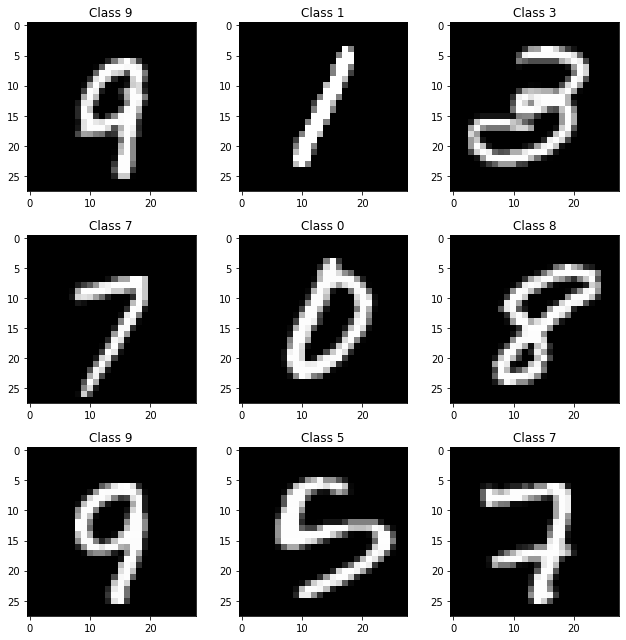

In [4]:
alpha = 5e-2
epochs = 10
nbatchs = 100
W_list = SGD(weights, X_train,Y_train,epochs=epochs,nbatchs=nbatchs,alpha = alpha)


##################################################
#Test the network and write down the performance
##################################################
print("X_test",X_test.shape)
Ypred = Feed_forward(W_list, X_test)[-1]
print("Y_pred",Ypred.shape)
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger
Y = np.argmax(Ypred, axis=1)
for i in range(9):
    plt.subplot(3,3,i+1)
    num = np.random.randint(0, len(X_test))
    plt.imshow(X_test.reshape(len(X_test),28,28)[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y[num]))
plt.tight_layout()

We can clearly see that as epoch increases accuracy of Neural Network increases and RMS error decreases.But this not happence linearly but we get high accuracy for high epoch but it will take long time to finish.

<b> Part - (2) : Understanding activation functions </b>

In this part you will learn to use different activation functions for the classification task and compare their performances.

1. Train MNIST digit classification problem with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part
2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br>
NOTE: You can use the classification network designed by you from scratch (or) you can build the model using pytorch.



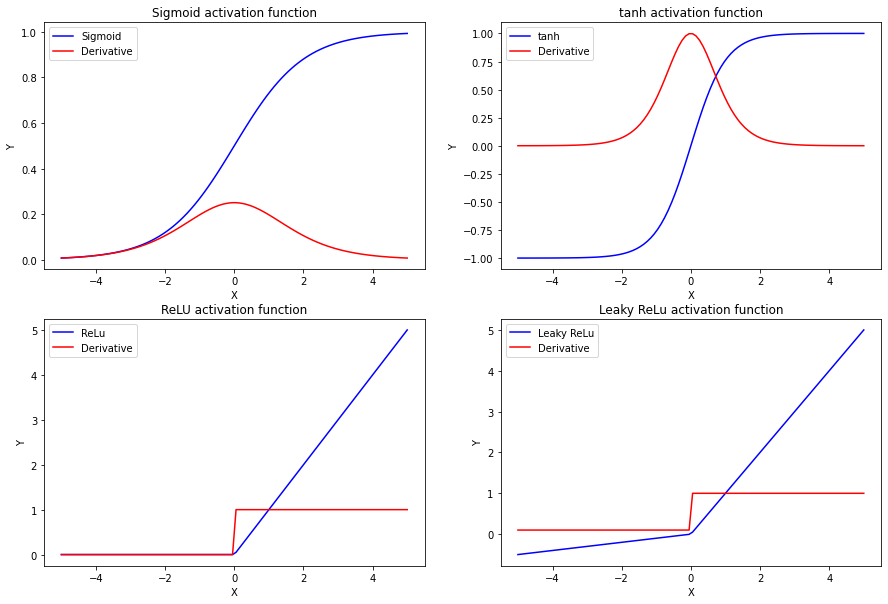

In [3]:
##################################################
#Train the network with different activation functions
##################################################

# Activation functions

# sigmoid activation function
def sigmoid(x):
    y = (1/(1 + np.exp(-x)))
    g = y*(1-y) # derivative
    return y,g

# tanh activation function
def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2 # derivative
    return t,dt

# ReLU activation function
def ReLu(x):
  y =  np.maximum(0, x)
  g = np.zeros((x.shape)) # for derivative
  g[x<=0] = 0
  g[x>0] = 1
  return y,g

# Leaky ReLU activation function
def Leaky_ReLu(x):
  y =  np.maximum(0.1*x, x)
  g = np.zeros((x.shape)) # for derivative
  g[x<=0] = 0.1
  g[x>0] = 1
  return y,g


# Plot Activation functions
x_axis =np.linspace(-5,5,100)

y1 = sigmoid(x_axis)[0]
g1 = sigmoid(x_axis)[1]

y2 = tanh(x_axis)[0]
g2 = tanh(x_axis)[1]

y3 = ReLu(x_axis)[0]
g3 = ReLu(x_axis)[1]

y4 = Leaky_ReLu(x_axis)[0]
g4 = Leaky_ReLu(x_axis)[1]

fig, (ax1,ax2) = plt.subplots(2,2,figsize=(15,10))
ax1[0].plot(x_axis,y1, c ='b')
ax1[0].plot(x_axis,g1,c ='r')
ax1[0].set_title('Sigmoid activation function')
ax1[0].set_xlabel('X')
ax1[0].set_ylabel('Y')
ax1[0].legend(["Sigmoid","Derivative"])

ax1[1].plot(x_axis,y2, c ='b')
ax1[1].plot(x_axis,g2,c ='r')
ax1[1].set_title('tanh activation function')
ax1[1].set_xlabel('X')
ax1[1].set_ylabel('Y')
ax1[1].legend(["tanh","Derivative"])

ax2[0].plot(x_axis,y3, c ='b')
ax2[0].plot(x_axis,g3,c ='r')
ax2[0].set_title('ReLU activation function')
ax2[0].set_xlabel('X')
ax2[0].set_ylabel('Y')
ax2[0].legend(["ReLu","Derivative"])

ax2[1].plot(x_axis,y4, c ='b')
ax2[1].plot(x_axis,g4,c ='r')
ax2[1].set_title('Leaky ReLu activation function')
ax2[1].set_xlabel('X')
ax2[1].set_ylabel('Y')
ax2[1].legend(["Leaky ReLu","Derivative"])
plt.show()

def Feed_forward_2(Weights,x,activation):
    
    w1,w2,w3,w4,b1,b2,b3,b4  = Weights
    
    #1-Hidden Layer
    first = activation(x@w1+b1)[0]
    #2-Hidden Layer
    second = activation(first@w2+b2)[0]
    #3-Hidden Layer
    third = activation(second@w3+b3)[0]
    
    #Output Layer
    return [first, second, third, Softmax(third@w4+b4)]

def BP_2(weights, x, t,outputs ,eta,der_activation):
    
    w1,w2,w3,w4,b1,b2,b3,b4  = weights
    
    first, second, third, y =  outputs
    t = np.eye(10)[t] # 1-hot coding format
    
    w4_delta = (t-y)
   
    w3_error = w4_delta@w4.T
    w3_delta = w3_error * der_activation(third)[1]

    w2_error = w3_delta@w3.T
    w2_delta = w2_error *  der_activation(second)[1]

    w1_error = w2_delta@w2.T
    w1_delta = w1_error * der_activation(first)[1]

    eta = -eta/x.shape[0]

    w4 -= eta * (third.T@w4_delta)
    b4 -= eta * w4_delta.sum(axis=0)

    w3 -= eta * (second.T@w3_delta)
    b3 -= eta * w3_delta.sum(axis=0)

    w2 -= eta * (first.T@w2_delta)
    b2 -= eta * w2_delta.sum(axis=0)

    w1 -= eta * (x.T@w1_delta)
    b1 -= eta * w1_delta.sum(axis=0)
    
    weights = [w1,w2,w3,w4,b1,b2,b3,b4]
    
    return weights

def SGD_2(weights, x_train, y_train, epochs,nbatchs, alpha,activation):
    
    index = np.arange(x_train.shape[0])
    print("Training data: %d" % (x_train.shape[0]))
    
    f_weights = []
    T_loss = 0
    ac = 0
    for j in range(epochs):
        np.random.shuffle(index)
        iterations = round(x_train.shape[0]/nbatchs)
        #print("\nEpochs: %2d \ %2d \n"% (j+1,epochs))
        for i in range(iterations):
            f = i*nbatchs
            l = f+nbatchs
            
            if(l>(x_train.shape[0]-1)):
                l = x_train.shape[0]

            x = x_train[index[f:l]]
            y = y_train[index[f:l]]

            outputs = Feed_forward_2(weights, x,activation)
            
            ypred = outputs[-1]
            t = np.eye(10)[y] # 1-hot coding format

            accuracy_t = accuracy(ypred, t)[0]
            
            ac = accuracy_t

            weights= BP_2(weights, x, y, outputs, alpha,activation)
            loss = RMS_Error(ypred, t, weights)
            T_loss = loss
        
        print("Acurracy :- ",ac)
        print("RMS_Error :- ",T_loss)

    w1,w2,w3,w4,b1,b2,b3,b4  = weights
    f_weights = [w1.copy(),w2.copy(),w3.copy(),w4.copy(),  b1.copy(),b2.copy(),b3.copy(),b4.copy() ]
    return f_weights


#Write down the accuracies and report your observations

In [6]:

##################################################
#Write down the accuracies and report your observations
##################################################

weights = Three_layer_NN(In_nodes=784,Hid_nodes=512,Out_nodes=10)

alpha = 5e-2
epochs = 10
nbatchs = 100
act = [sigmoid,tanh,ReLu,Leaky_ReLu]

print("\nSigmoid :-")
# Using sigmoid activation
W_list = SGD_2(weights, X_train,Y_train,epochs=epochs,nbatchs=nbatchs,alpha = alpha,activation = act[0])

print("\ntanh :-")
# Using tanh activation
W_list = SGD_2(weights, X_train,Y_train,epochs=epochs,nbatchs=nbatchs,alpha = alpha,activation = act[1])

print("\nRelu :-")
# Using Relu activation
W_list = SGD_2(weights, X_train,Y_train,epochs=epochs,nbatchs=nbatchs,alpha = alpha,activation = act[2])

print("\nLeaky_ReLu :-")
# Using Leaky_ReLu activation
W_list = SGD_2(weights, X_train,Y_train,epochs=epochs,nbatchs=nbatchs,alpha = alpha,activation = act[3])

w's :-  (784, 512) (512, 512) (512, 512) (512, 10)
b's :-  (1, 512) (1, 512) (1, 512) (1, 10)

Sigmoid :-
Training data: 60000
Acurracy :-  12.0
RMS_Error :-  2.4124676163629637
Acurracy :-  23.0
RMS_Error :-  1.9716744153130354
Acurracy :-  44.0
RMS_Error :-  1.6363068171953572
Acurracy :-  69.0
RMS_Error :-  1.1022703842524302
Acurracy :-  65.0
RMS_Error :-  1.1905880899790657
Acurracy :-  81.0
RMS_Error :-  0.8544003745317531
Acurracy :-  82.0
RMS_Error :-  0.9394147114027968
Acurracy :-  83.0
RMS_Error :-  0.7314369419163897
Acurracy :-  86.0
RMS_Error :-  0.7921489758877429
Acurracy :-  95.0
RMS_Error :-  0.32015621187164245

tanh :-
Training data: 60000
Acurracy :-  90.0
RMS_Error :-  0.5979130371550699
Acurracy :-  92.0
RMS_Error :-  0.5787918451395113
Acurracy :-  93.0
RMS_Error :-  0.43588989435406733
Acurracy :-  94.0
RMS_Error :-  0.4663689526544407
Acurracy :-  94.0
RMS_Error :-  0.653834841531101
Acurracy :-  97.0
RMS_Error :-  0.27386127875258304
Acurracy :-  96.0
RMS_Err

We can see that we get very low accuracy for sigmoid among all activation functions.Since sigmoid is used mainly for binary classification.
We get high accuracy for Leaky Relu with lowest error.We also got 100% accuracy with Leaky Relu.Hence we can see that nowadays we use Leaky Relu mostly.

Prediction using Leaky Relu activation funtion

We can see that, we get accuracy we get %.2f


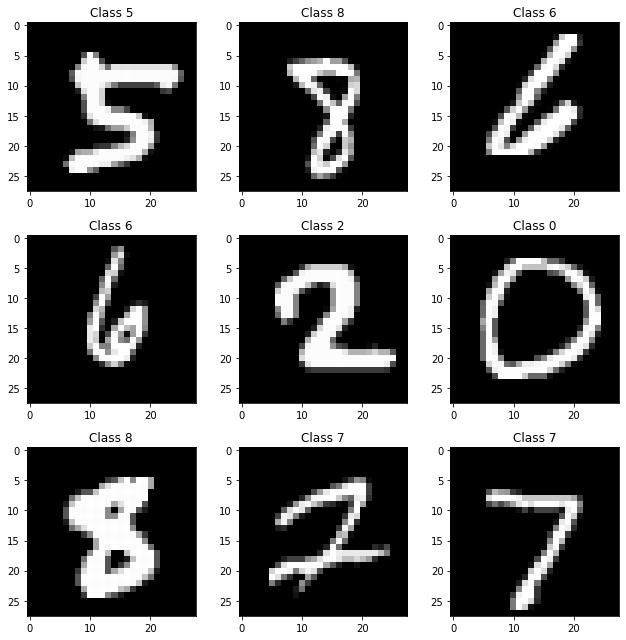

In [7]:

out = Feed_forward(W_list, X_test)
y = out[-1]

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger
Y = np.argmax(y, axis=1)
for i in range(9):
    plt.subplot(3,3,i+1)
    num = np.random.randint(0, len(X_test))
    plt.imshow(X_test.reshape(len(X_test),28,28)[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y[num]))
plt.tight_layout()

We can clearly see above image that almost all got labeled corretly using Leaky Relu activation in Neural Network.

<b> Part - (3) : Understanding optimization algorithms </b>

In this part you will learn to use different optimiztion algorithm apart from SGD.

1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm.
3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms.
4. Report your observations.

In [4]:
##################################################
#Train the network using Adam optimizer
##################################################


# ReLU activation function
# Leaky ReLU activation function
def Leaky_ReLu(x):
  y =  np.maximum(0.1*x, x)
  g = np.zeros((x.shape)) # for derivative
  g[x<=0] = 0.1
  g[x>0] = 1
  return y,g

def Grad(weights, x, t,outputs ,eta, gamma, nabla):
    
    w1,w2,w3,w4,b1,b2,b3,b4  = weights
    
    vw1 = np.zeros_like(w1)
    vw2 = np.zeros_like(w2)
    vw3 = np.zeros_like(w3)
    vw4 = np.zeros_like(w4)
    vb1 = np.zeros_like(b1)
    vb2 = np.zeros_like(b2)
    vb3 = np.zeros_like(b3)
    vb4 = np.zeros_like(b4)
    
    first, second, third, y =  outputs
    t = np.eye(10)[t] # 1-hot coding format
    
    w4_delta = (t-y)
   
    w3_error = w4_delta@w4.T
    w3_delta = w3_error * Leaky_ReLu(third)[1]

    w2_error = w3_delta@w3.T
    w2_delta = w2_error *  Leaky_ReLu(second)[1]

    w1_error = w2_delta@w2.T
    w1_delta = w1_error * Leaky_ReLu(first)[1]

    
    eta = -eta/x.shape[0]

    vw4 = gamma*vw4 + eta * (third.T@w4_delta + nabla*w4)
    vb4 = gamma*vb4 + eta * w4_delta.sum(axis=0)
 
    vw3 = gamma*vw3 + eta * (second.T@w3_delta + nabla*w3)
    vb3 = gamma*vb3 + eta * w3_delta.sum(axis=0)

    vw2 = gamma*vw2 + eta * (first.T@w2_delta + nabla*w2)
    vb2 = gamma*vb2 + eta * w2_delta.sum(axis=0)

    vw1 = gamma*vw1 + eta * (x.T@w1_delta + nabla*w1)
    vb1 = gamma*vb1 + eta * w1_delta.sum(axis=0)
    
    g = [vw1,vw2,vw3,vw4,vb1,vb2,vb3,vb4]
    
    return g
def Adam_opt_aks(t,w,b,dw,db,eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
    w1,w2,w3,w4,b1,b2,b3,b4  = weights
    
    m_dw, v_dw = 0, 0
    m_db, v_db = 0, 0
   
    ## momentum beta 1
    # *** weights *** #
    m_dw = beta1*m_dw + (1-beta1)*dw
    # *** biases *** #
    m_db = beta1*m_db + (1-beta1)*db

    ## rms beta 2
    # *** weights *** #
    v_dw = beta2*v_dw + (1-beta2)*(dw**2)
    # *** biases *** #
    v_db = beta2*v_db + (1-beta2)*(db**2)

    ## bias correction
    m_dw_corr = m_dw/(1-beta1**t)
    m_db_corr = m_db/(1-beta1**t)
    v_dw_corr = v_dw/(1-beta2**t)
    v_db_corr = v_db/(1-beta2**t)

    ## update weights and biases
    w = w - eta*(m_dw_corr/(np.sqrt(v_dw_corr)+ epsilon))
    b = b - eta*(m_db_corr/(np.sqrt(v_db_corr)+ epsilon))

    return w,b

def ALL_W(weights,X_train,Y_train,outputs,eta =1e-3, gamma=0, nabla=0.01,beta1=0.9, beta2=0.999, epsilon=1e-8):
  [w1,w2,w3,w4,b1,b2,b3,b4] = weights
  outputs = Feed_forward(weights,X_train)
  t = 1
  [vw1,vw2,vw3,vw4,vb1,vb2,vb3,vb4] = Grad(weights,X_train,Y_train,outputs ,1e-3, gamma=0, nabla=0.01)
  w1 ,b1 = Adam_opt_aks(t,w1,b1,vw1,vb1,eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8)
  w2 ,b2 = Adam_opt_aks(t,w2,b2,vw2,vb2,eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8)
  w3 ,b3 = Adam_opt_aks(t,w3,b3,vw3,vb3,eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8)
  w4 ,b4 = Adam_opt_aks(t,w4,b4,vw4,vb4,eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8)
  return  [ w1,w2,w3,w4,b1,b2,b3,b4 ]


def Train_Adam(weights, x_train, y_train, epochs = 10, nbatchs=25, eta =1e-3,
                       gamma=0, nabla=0.01,beta1=0.9, beta2=0.999, epsilon=1e-8):
    
    index = np.arange(x_train.shape[0])
    print("Training data: %d" % (x_train.shape[0]))
    
    f_weights = []
    T_loss = 0
    ac = 0
    for j in range(epochs):
        np.random.shuffle(index)
        iterations = round(x_train.shape[0]/nbatchs)
        #print("\nEpochs: %2d \ %2d \n"% (j+1,epochs))
        for i in range(iterations):
            f = i*nbatchs
            l = f+nbatchs
            
            if(l>(x_train.shape[0]-1)):
                l = x_train.shape[0]

        x = x_train[index[f:l]]
        y = y_train[index[f:l]]

        outputs = Feed_forward(weights,x)
            
        ypred = outputs[-1]
        t = np.eye(10)[y] # 1-hot coding format

        accuracy_t = accuracy(ypred, t)[0]
            
        ac = accuracy_t

        weights= ALL_W(weights,x,y,outputs ,eta =1e-3,
                       gamma=0, nabla=0.01,beta1=0.9, beta2=0.999, epsilon=1e-8)
        loss = RMS_Error(ypred, t, weights)
        T_loss = loss
        
    print("Acurracy :- ",ac)
    print("RMS_Error :- ",T_loss)

    w1,w2,w3,w4,b1,b2,b3,b4  = weights
    f_weights = [w1.copy(),w2.copy(),w3.copy(),w4.copy(),  b1.copy(),b2.copy(),b3.copy(),b4.copy() ]
    return f_weights
    
def SGD_Compare(weights, x_train, y_train, epochs,nbatchs, alpha,activation):
    
    index = np.arange(x_train.shape[0])
    print("Training data: %d" % (x_train.shape[0]))
    
    f_weights = []
    T_loss = 0
    ac = 0
    for j in range(epochs):
        np.random.shuffle(index)
        iterations = round(x_train.shape[0]/nbatchs)
        #print("\nEpochs: %2d \ %2d \n"% (j+1,epochs))
        for i in range(iterations):
            f = i*nbatchs
            l = f+nbatchs
            
            if(l>(x_train.shape[0]-1)):
                l = x_train.shape[0]

        x = x_train[index[f:l]]
        y = y_train[index[f:l]]

        outputs = Feed_forward_2(weights, x,activation)
            
        ypred = outputs[-1]
        t = np.eye(10)[y] # 1-hot coding format

        accuracy_t = accuracy(ypred, t)[0]
            
        ac = accuracy_t

        weights= BP_2(weights, x, y, outputs, alpha,activation)
        loss = RMS_Error(ypred, t, weights)
        T_loss = loss
        
    print("Acurracy :- ",ac)
    print("RMS_Error :- ",T_loss)

    w1,w2,w3,w4,b1,b2,b3,b4  = weights
    f_weights = [w1.copy(),w2.copy(),w3.copy(),w4.copy(),  b1.copy(),b2.copy(),b3.copy(),b4.copy() ]
    return f_weights



In [8]:

##################################################
#Test the network
##################################################
alpha = 5e-2
epochs = 200
nbatchs = 100
weights = Three_layer_NN(In_nodes=784,Hid_nodes=512,Out_nodes=10)

print("\nLeaky_ReLu Using SGD :-")
# Using Leaky_ReLu activation
W_list1 = SGD_Compare(weights, X_train,Y_train,epochs=epochs,nbatchs=nbatchs,alpha = alpha,activation = Leaky_ReLu)

print("\nLeaky_ReLu Using Adam Optimizer :-")
W_list = Train_Adam(weights, X_train,Y_train,epochs=epochs,nbatchs=nbatchs, eta =alpha,
                       gamma=0, nabla=0.01,beta1=0.9, beta2=0.999, epsilon=1e-8)


w's :-  (784, 512) (512, 512) (512, 512) (512, 10)
b's :-  (1, 512) (1, 512) (1, 512) (1, 10)

Leaky_ReLu Using SGD :-
Training data: 60000
Acurracy :-  92.0
RMS_Error :-  0.7262919523166975

Leaky_ReLu Using Adam Optimizer :-
Training data: 60000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in true_divide


Acurracy :-  8.0
RMS_Error :-  2.8301943396169813


We can see that we get little higher accuracy with Adam optimizer.We can see that Adam optimizer gives result very faster compare to SGD optimizer.SGD is unstable for convergence. But Adam is stable for convergence hence it converge very fastly.But for generalization SGD is more prefered over Adam.

Performance of Leaky_Relu using SGD
Performance of Leaky_Relu using Adam Optimizer


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


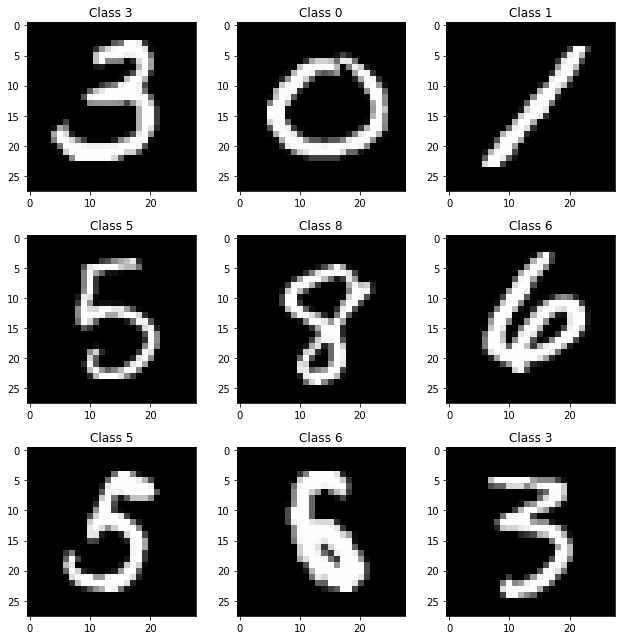

In [11]:
##################################################
#Compare the accuracies an deport your observations
##################################################
print("Performance of Leaky_Relu using SGD") 
out = Feed_forward(W_list, X_test)
y = out[-1]

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger
Y = np.argmax(y, axis=1)
for i in range(9):
    plt.subplot(3,3,i+1)
    num = np.random.randint(0, len(X_test))
    plt.imshow(X_test.reshape(len(X_test),28,28)[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y[num]))
plt.tight_layout()


print("Performance of Leaky_Relu using Adam Optimizer") 
Ypred = Feed_forward(W_list, X_test)[-1]
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger
Y = np.argmax(Ypred, axis=1)
for i in range(9):
    plt.subplot(3,3,i+1)
    num = np.random.randint(0, len(X_test))
    plt.imshow(X_test.reshape(len(X_test),28,28)[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y[num]))
plt.tight_layout()

<b> Part - (4) : Understanding regularization methods </b>

In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem.</br>
Using the above built network, inculcate the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.

1. Weight regularization
2. Dropout with a probability of 0.5
3. Early stopping


# Part1 - L2 Regularization

In [37]:
def SGD_L2(weights, x, t,outputs ,eta, l2):
    
    w1,w2,w3,w4,b1,b2,b3,b4  = weights
    
    vw1 = np.zeros_like(w1)
    vw2 = np.zeros_like(w2)
    vw3 = np.zeros_like(w3)
    vw4 = np.zeros_like(w4)
    vb1 = np.zeros_like(b1)
    vb2 = np.zeros_like(b2)
    vb3 = np.zeros_like(b3)
    vb4 = np.zeros_like(b4)
    
    first, second, third, y =  outputs
    t = np.eye(10)[t] # 1-hot coding format
    
    w4_delta = (t-y)
   
    w3_error = w4_delta@w4.T
    #w3_delta = w3_error * ReLu(third,derivative=True)
    w3_delta = w3_error * Leaky_ReLu(third)[1]

    w2_error = w3_delta@w3.T
    #w2_delta = w2_error * ReLu(second,derivative=True)
    w2_delta = w2_error *  Leaky_ReLu(second)[1]

    w1_error = w2_delta@w2.T
    #w1_delta = w1_error * ReLu(first,derivative=True)
    w1_delta = w1_error * Leaky_ReLu(first)[1]

    
    eta = -eta/x.shape[0]

    vw4 =  eta * (third.T@w4_delta + l2*w4)
    vb4 =  eta * w4_delta.sum(axis=0)
 
    vw3 =  eta * (second.T@w3_delta + l2*w3)
    vb3 =  eta * w3_delta.sum(axis=0)

    vw2 =  eta * (first.T@w2_delta + l2*w2)
    vb2 =  eta * w2_delta.sum(axis=0)

    vw1 = eta * (x.T@w1_delta + l2*w1)
    vb1 = eta * w1_delta.sum(axis=0)

    w4 -= vw4
    b4 -= vb4

    w3 -= vw3
    b3 -= vb3

    w2 -= vw2
    b2 -= vb2

    w1 -= vw1
    b1 -= vb1
    
    weights = [w1,w2,w3,w4,b1,b2,b3,b4]
    
    return weights

def Train_l2(weights, x_train, y_train, epochs = 10, nbatchs=25, alpha = 1e-3,l2 = 0.001):
    
    index = np.arange(x_train.shape[0])
    print("Training data: %d" % (x_train.shape[0]))
    
    f_weights = []
    T_loss = 0
    ac = 0
    for j in range(epochs):
        np.random.shuffle(index)
        iterations = round(x_train.shape[0]/nbatchs)
        print("\nEpochs: %2d \ %2d \n"% (j+1,epochs))
        for i in range(iterations):
            f = i*nbatchs
            l = f+nbatchs
            
            if(l>(x_train.shape[0]-1)):
                l = x_train.shape[0]

        x = x_train[index[f:l]]
        y = y_train[index[f:l]]

        outputs = Feed_forward(weights, x)
            
        ypred = outputs[-1]
        t = np.eye(10)[y] # 1-hot coding format

        accuracy_t = accuracy(ypred, t)[0]
            
        ac = accuracy_t

        weights= SGD_L2(weights, x, y,outputs ,alpha,l2)
        loss = RMS_Error(ypred, t, weights)
        T_loss = loss
        
        print("Acurracy :- ",ac)
        print("RMS_Error :- ",T_loss)

    w1,w2,w3,w4,b1,b2,b3,b4  = weights
    f_weights = [w1.copy(),w2.copy(),w3.copy(),w4.copy(),  b1.copy(),b2.copy(),b3.copy(),b4.copy() ]
    return f_weights



In [38]:
##################################################
#Test the network
##################################################
alpha = 5e-2
l2 = 0.1
epochs = 100
nbatchs = 2000
weights = Three_layer_NN(In_nodes=784,Hid_nodes=512,Out_nodes=10)

print("\nLeaky_ReLu Using L2 regularization :-")
W_list41 = Train_l2(weights, X_train, Y_train, epochs = epochs, nbatchs=nbatchs, alpha = alpha,l2 =l2)
#W_list = Train_Adam(weights, X_train,Y_train,epochs=epochs,nbatchs=nbatchs, eta =alpha,
                       #gamma=0, nabla=0.01,beta1=0.9, beta2=0.999, epsilon=1e-8)

w's :-  (784, 512) (512, 512) (512, 512) (512, 10)
b's :-  (1, 512) (1, 512) (1, 512) (1, 10)

Leaky_ReLu Using L2 regularization :-
Training data: 60000

Epochs:  1 \ 100 

Acurracy :-  14.4
RMS_Error :-  1.6697679479496546

Epochs:  2 \ 100 

Acurracy :-  16.5
RMS_Error :-  1.7339622256554494

Epochs:  3 \ 100 

Acurracy :-  17.15
RMS_Error :-  1.7735909900537947

Epochs:  4 \ 100 

Acurracy :-  22.9
RMS_Error :-  1.7419816302131317

Epochs:  5 \ 100 

Acurracy :-  24.0
RMS_Error :-  1.7966983608830949

Epochs:  6 \ 100 

Acurracy :-  27.8
RMS_Error :-  1.798019744051772

Epochs:  7 \ 100 

Acurracy :-  31.7
RMS_Error :-  1.7890989352185083

Epochs:  8 \ 100 

Acurracy :-  34.1
RMS_Error :-  1.7898673135179601

Epochs:  9 \ 100 

Acurracy :-  38.95
RMS_Error :-  1.7792554622650454

Epochs: 10 \ 100 

Acurracy :-  40.7
RMS_Error :-  1.761462460570761

Epochs: 11 \ 100 

Acurracy :-  47.35
RMS_Error :-  1.6371087318806896

Epochs: 12 \ 100 

Acurracy :-  45.1
RMS_Error :-  1.6703667262

We can cleary see that after using l2 lagularizer , we get high accuracy with less epoch and weights matrix's gets normalized.So don't get overflow error using l2 regularization.Here too accuracy was increased with epoch.

# Drop out

In [9]:
def BP(weights, x, t,outputs ,eta):
    
    w1,w2,w3,w4,b1,b2,b3,b4  = weights
    
    first, second, third, y =  outputs
    t = np.eye(10)[t] # 1-hot coding format
    
    w4_delta = (t-y)
   
    w3_error = w4_delta@w4.T
    w3_delta = w3_error * Leaky_ReLu(third)[1]

    w2_error = w3_delta@w3.T
    w2_delta = w2_error *  Leaky_ReLu(second)[1]

    w1_error = w2_delta@w2.T
    w1_delta = w1_error * Leaky_ReLu(first)[1]

    eta = -eta/x.shape[0]

    w4 -= eta * (third.T@w4_delta)
    b4 -= eta * w4_delta.sum(axis=0)

    w3 -= eta * (second.T@w3_delta)
    b3 -= eta * w3_delta.sum(axis=0)

    w2 -= eta * (first.T@w2_delta)
    b2 -= eta * w2_delta.sum(axis=0)

    w1 -= eta * (x.T@w1_delta)
    b1 -= eta * w1_delta.sum(axis=0)
    
    weights = [w1,w2,w3,w4,b1,b2,b3,b4]
    
    return weights


def Dropout(x, dropout_percent):
    mask = np.random.binomial([np.ones_like(x)],(1-dropout_percent))[0]  / (1-dropout_percent)
    return x*mask

def predict_dropout(weights, x, dropout_percent):
    
    w1,w2,w3,w4,b1,b2,b3,b4  = weights 

    #1-Hidden Layer
    first = Leaky_ReLu(x@w1+b1)[0]
    first = Dropout(first, dropout_percent)

    #2-Hidden Layer
    second = Leaky_ReLu(first@w2+b2)[0]
    second = Dropout(second, dropout_percent)

    #3-Hidden Layer
    third = Leaky_ReLu(second@w3+b3)[0]
    third = Dropout(third, dropout_percent)
    
    #Output Layer
    y = Softmax(third@w4+b4)
    return [first, second, third, y]

def Train_dropout(weights, x_train, y_train, epochs , nbatchs, alpha ,l2 , dropout_percent):
    
    index = np.arange(x_train.shape[0])
    print("Training data: %d" % (x_train.shape[0]))
    
    f_weights = []
    T_loss = 0
    ac = 0
    for j in range(epochs):
        np.random.shuffle(index)
        iterations = round(x_train.shape[0]/nbatchs)
        print("\nEpochs: %2d \ %2d \n"% (j+1,epochs))
        for i in range(iterations):
            f = i*nbatchs
            l = f+nbatchs
            
            if(l>(x_train.shape[0]-1)):
                l = x_train.shape[0]

            x = x_train[index[f:l]]
            y = y_train[index[f:l]]

            outputs = predict_dropout(weights, x, dropout_percent)
            
            ypred = outputs[-1]
            t = np.eye(10)[y] # 1-hot coding format

            accuracy_t = accuracy(ypred, t)[0]
            
            ac = accuracy_t

            weights=  BP(weights, x,y,outputs ,alpha)
            loss = RMS_Error(ypred, t, weights)
            T_loss = loss
        
        print("Acurracy :- ",ac)
        print("RMS_Error :- ",T_loss)

    w1,w2,w3,w4,b1,b2,b3,b4  = weights
    f_weights = [w1.copy(),w2.copy(),w3.copy(),w4.copy(),  b1.copy(),b2.copy(),b3.copy(),b4.copy() ]
    return f_weights



In [ ]:
##################################################
#Test the network
##################################################
alpha = 5e-2
l2 = 0
epochs = 100
nbatchs = 2000
weights = Three_layer_NN(In_nodes=784,Hid_nodes=512,Out_nodes=10)

print("\nLeaky_ReLu Using 50% dropout :-")
W_list42 = Train_dropout(weights, X_train, Y_train, epochs = epochs , nbatchs=nbatchs , alpha = alpha,l2 = l2, dropout_percent=0.5)

w's :-  (784, 512) (512, 512) (512, 512) (512, 10)
b's :-  (1, 512) (1, 512) (1, 512) (1, 10)

Leaky_ReLu Using 50% dropout :-
Training data: 60000

Epochs:  1 \ 100 

Acurracy :-  17.45
RMS_Error :-  2.0197153264754912

Epochs:  2 \ 100 



Using Dropout accuracy was actually decrased.Since we are droping some neuron but they can have importance hence accuracy is deacreased.

<b> Part - (5) : Understanding vanishing gradients problem </b> </br>
Use the best trained models in part (4) to understand the problem of vanishing gradient.
1. Plot the norm of the gradients for various layers with/without weight regularization
3. Repeat the same experiments with skip connections. You can choose your desired skip connections in the network by increasing the number of hidden layers.
4. Report your observations on the differences between the plots in the above two cases.

In [ ]:
##################################################
#Plots without skip connections
##################################################















##################################################
#Plots with skip connections
##################################################












##################################################
#Observations
##################################################






